# HypothesisTesting-Cutlets Dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\Cutlets.xls")
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
df.shape
#rows=51 and col=2

(51, 2)

In [4]:
df.columns
# Unit A - diameter of Cutlets from unit A
# Unit B - diameter of Cutlets from unit B

Index(['Unit A', 'Unit B'], dtype='object')

In [5]:
df.dtypes
# Both columns are float data type

Unit A    float64
Unit B    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 944.0 bytes


In [19]:
df.isnull().sum()
# both columns have total 16 null records
# simply replace them with mean value of columns

Unit A    16
Unit B    16
dtype: int64

In [20]:
mean_A=np.mean(df["Unit A"])
mean_B=np.mean(df["Unit B"])

df["Unit A"]=df["Unit A"].fillna(mean_A)
df["Unit B"]=df["Unit B"].fillna(mean_B)

In [21]:
df.isnull().sum()
# now all null values are replaced by mean values

Unit A    0
Unit B    0
dtype: int64

In [22]:
df.describe()

,Unit A,Unit B
count,51.000000,51.000000
mean,7.019091,6.964297
std,0.237828,0.283175
min,6.437600,6.038000
25%,6.920150,6.799400
50%,7.019091,6.964297
75%,7.156050,7.108600
max,7.516900,7.545900


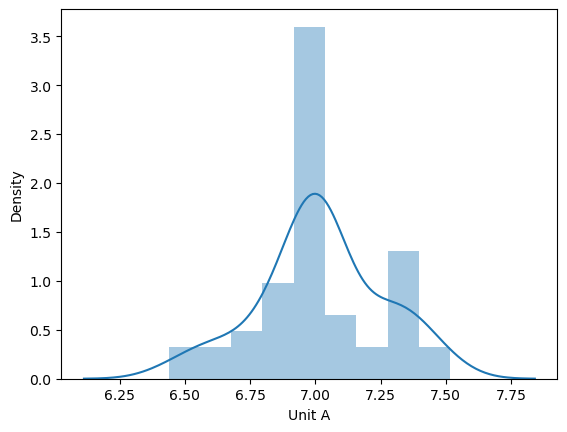

In [23]:
sns.distplot(df["Unit A"])
plt.show()
# Data is slightly left skewed

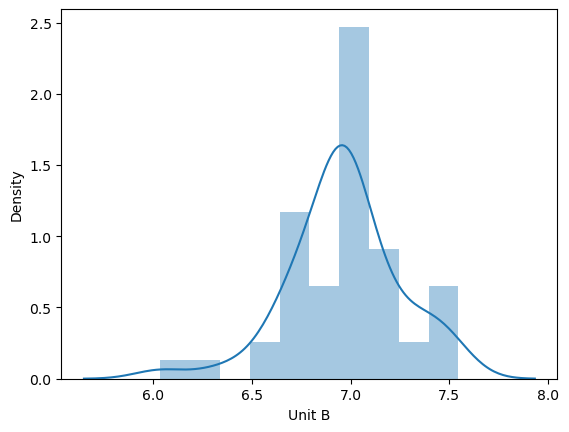

In [24]:
sns.distplot(df["Unit B"])
plt.show()
# Data is slightly left skewwed

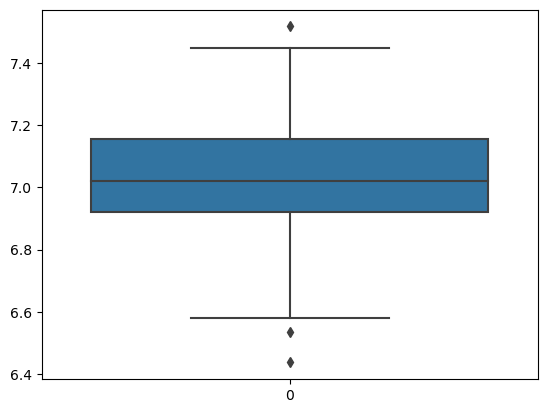

In [25]:
sns.boxplot(df["Unit A"])
plt.show()
# outliers are present

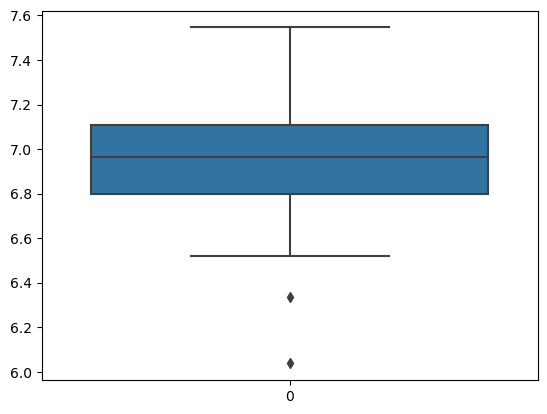

In [27]:
sns.boxplot(df["Unit B"])
plt.show()
# outliers are present.

In [28]:
# with the help of winsorizer remove this outlier
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Unit A",tail="both")
df["Unit A"]=winsor.fit_transform(df[["Unit A"]])

winsor=Winsorizer(capping_method="iqr",fold=1.5,variables="Unit B",tail="both")
df["Unit B"]=winsor.fit_transform(df[["Unit B"]])

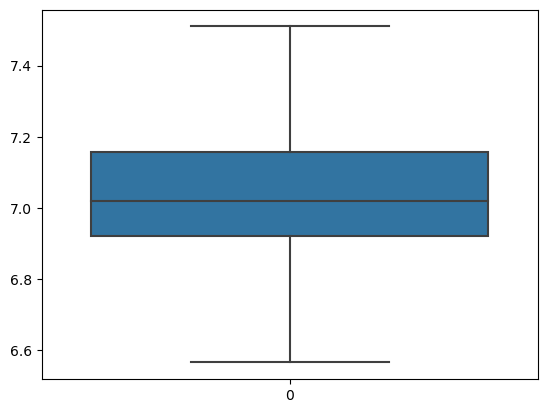

In [29]:
sns.boxplot(df["Unit A"])
plt.show()
# outliers from unit A columns are removed successfully

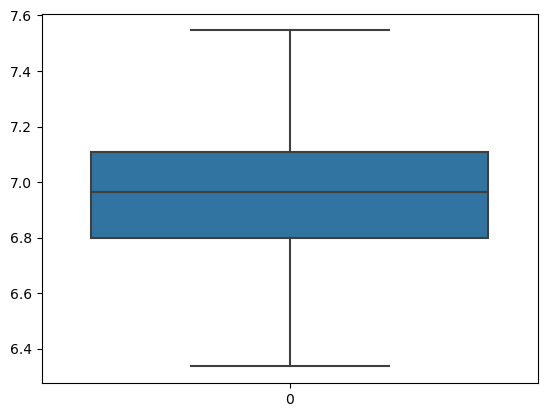

In [30]:
sns.boxplot(df["Unit B"])
plt.show()
# outliers from unit B columns are removed successfully

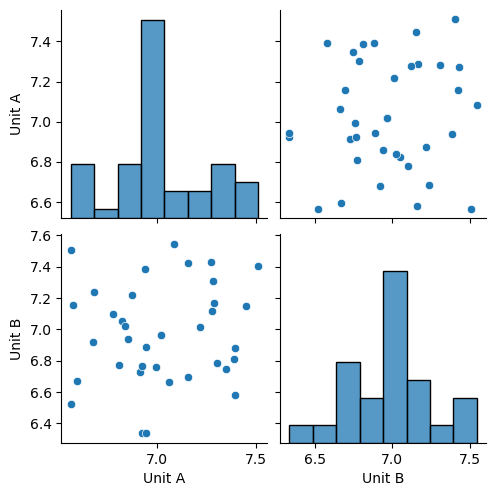

In [31]:
sns.pairplot(df)
plt.show()

### Check For normal distribution by QQ plot

[]

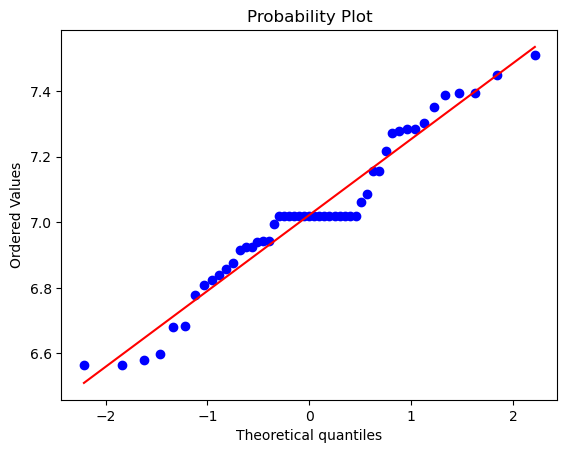

In [33]:
import pylab
stats.probplot(df["Unit A"],dist="norm",plot=pylab)
plt.plot()
# from the QQ plot, data of Unit A col is not normally distributed

[]

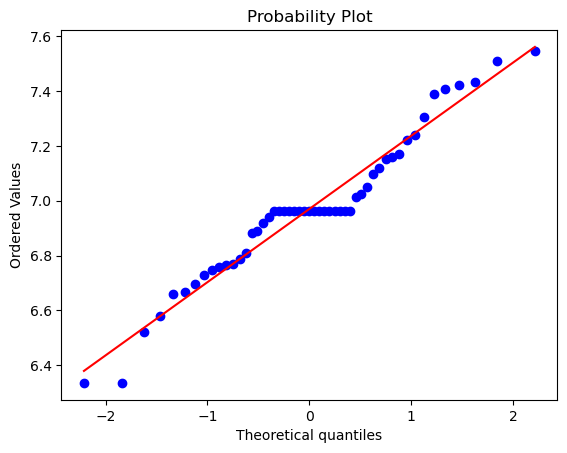

In [34]:
import pylab
stats.probplot(df["Unit B"],dist="norm",plot=pylab)
plt.plot()
# from the QQ plot, data of Unit B col is not normally distributed

### check for normal distribution by Shapiro-Wilk Test 

In [37]:
stats.shapiro(df["Unit A"])

ShapiroResult(statistic=0.9523330330848694, pvalue=0.03946642577648163)

In [ ]:
# p-val is 0.04 < 0.05
# So, Data is not normally distributed

In [38]:
stats.shapiro(df["Unit B"])

ShapiroResult(statistic=0.9565591812133789, pvalue=0.059534791857004166)

In [39]:
# p-val is 0.05 == 0.05
# So, Data is slightly normally distributed

In [42]:
stats.mannwhitneyu(df["Unit A"],df["Unit B"])

MannwhitneyuResult(statistic=1502.0, pvalue=0.17687348286913152)

### Conclusion: